In [4]:
# setup
from IPython.core.display import display,HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
display(HTML(open('../rise.css').read()))

# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sys
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.5, rc={'figure.figsize':(12, 6)})
sys. setrecursionlimit(10_000)

/tmp/ipykernel_484018/2941798365.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display,HTML


<h1>Searching (Divide and Conquer)</h2>
<h3>Last Time</h3>

We talked about computational models, and after a fortnight's dicsussion, concluded that the RAM model is the most appropriate for our study of algorithms. In this model, there are a finite number of CPU operations, each of which takes constant time. We can visit any memory address in a single step.

<h3>Searching</h3>

Let's clarify the problem of searching and what we are allowed to do.

We suppose that we have a C-style array of values. For concreteness, we take the values to be integers. The array consists of memory addresses starting at $0$ and ending at $n-1$. We know $n$, the length of the array, so we know the last memory address. We are also given a key, which is also an integer. Our goal is to return an index such that key is the value of the array at that index.

This model makes it clear that we can access any address in the array in one time step. If we want, we can also modify the array by changing the contents of one memory address at a time.

Python lists behave very similarly to the arrays that we have in mind. This is because Python lists are usually implemented as arrays of pointers [Source](https://www.geeksforgeeks.org/internal-working-of-list-in-python/). The main difference is that array slicing takes time propositional to the size of the slice in Python, but we could implement it in constant time using pointers. The python runtimes can be found [here](https://peps.python.org/pep-3128/#motivation).

<h3>Linear Search</h3>
The simplest solution is to look at each item in the array, one at a time, and check whether the value at the current address is equal to the key.

In [5]:
def linear_search(mylist, key):        #   cost         number of times run
    for i,v in enumerate(mylist):      #   c1               n
        if v == key:                   #   c2               n
            return i                   #   c3               0
    return -1                          #   c4               1
def test_search_function(search_function, sort = False): #Basic check that linear search behaves correctly.
    lists = [[0,1,2,3], list(range(10)), [1,3,2,0,1,0,5]]
    if sort:
        lists = [[0,1,2,3], list(range(10)), sorted([1,3,2,0,1,0,5])]
    keys = [1,2,-1]
    for l in lists:
        for key in keys:
            index = search_function(l,key)
            assert l[index]==key or (index == -1 and not key in l)
test_search_function(linear_search)

<h3>Runtime Analysis of linear search</h3>

In the best case, the key is the first item in mylist, and the function terminates immediately. Thus, the best-case cost of linear search is $O(1)$, constant time. In this case, the amount of time does not depend on the length of the list.

In the worst case, the key is not in the list at all. This forces the function to loop through the entire list, and creates a worst case cost of

$\hbox{Worst Case Cost(linear-search, } n) = c_1n + c_2n + c_4 \in O(n)$.

To define the average case, we need to define the distribution of the inputs, and there are different ways to do this. One distribution is to assume that key is equally likely to appear at any index in the list, and that it appears exactly once. In this case, the average case runtime is $O(n)$, since on average we will need to loop through half of the list.

<h3>Binary Search</h3>

Now we describe a basic technique that is used to search a <b>sorted</b> list much faster than the linear search. The idea is to "divide and conquer." If you want to find a specific page in a large book, look in the middle. If the page that you want is smaller than page in the middle, flip to the middle of the left half (1/4 of the way through the book). If the page number is larger than the page in the middle, flip to the middle of the right half (3/4) of the way through the book. We continue in this way, repeatedly shrinking the interval where we believe our page is located. Eventually, we will either find our page, or the interval will become 0 and we can conclude that the page is not in the book.

Here is an iterative implementation of binary search.

In [6]:
def iterative_binary_search(mylist, key):
  '''
  Iterative implementation of binary search. Assumes mylist is sorted.
  The behavior should be the same as the behavior of binary_search
  But it should be faster due to avoiding overhead.
  This does not necessarily return the smallest index such that mylist[index]=key
  '''
  current_lower_bound = 0
  current_upper_bound = len(mylist) #If the key is in mylist, then at all points in the program, its index is in [current_lower_bound,current_upper_bound)
  while current_upper_bound!= current_lower_bound: #We repeatedly shrink. Will shrink O(log(n)) times.
    middle = (current_lower_bound + current_upper_bound) // 2 #All of the operations inside the loop are simple, O(1).
    if key<mylist[middle]:  #Look in the left half.
        current_upper_bound = middle 
    elif key>mylist[middle]:    #Look in the right half.
        current_lower_bound = middle +1 
    elif mylist[middle] == key: #In this case, we found the key.
        return middle
  return -1 #Be careful. Are we creating an infinite loop?

test_search_function(iterative_binary_search, sort=True)

<h3>Runtime analysis of iterative binary search</h3>

In the best case, the key that we are searching for is found immediately. Thus, the best case runtime is constant, $O(1)$.

The worst case runtime occurs when the key is not in the list. In this case, the runtime inside the loop is constant $O(1)$, because it involves only checking $1$ memory address and comparison, which is assumed to be built into our CPU. Each time the loop is run, the size of the interval that might contain the key is cut in half. Initially, the key could be in any of $n$ locations. After the first loop, it could be in any of $\frac{n}{2}$ locations. After the second loop, it could be in any of $\frac{n}{4}$ locations. More generally, after $i$ iterations of the loop, the key could appear in any of $\frac{n}{2^i}$ locations. Once $2^i>n$, we conclude that the key is not in the list. Taking the log of both sides, we find that after $i>\log_2(n)$ iterations, we can stop running the loop. Therefore, the total worst case runtime is

\begin{align*}
\hbox{Worst Case Cost(iterative binary search, } n)=O(\log(n)).
\end{align*}

The average case runtime depends on the distribution of the lists and keys. If the key is assumed to appear at any index with equal probability, then we will observe an average case runtime of $O(\log(n))$, but we omit the calculations for this.

<h3>Recursive vs Iterative: Python specific optimizations</h3>

A recursive function calls itself. Notice that the iterative binary search does not call itself. Instead, it applies the same method in a loop until completion. Recursion is a more abstract technique than iteration. Every iterative function can be re-written as a recursive function simply by writing the variable that we iterate over as an argument. Every recursive function can be expressed as an iterative function where we use a variable to keep track of the call stack. [source](https://en.wikipedia.org/wiki/Recursion_(computer_science)#cite_note-9). For Recitation 01, you will have to write a recursive version of binary serach. Its runtime analysis will be the same as that of iterative binary search: In the worst case, its worst-case runtime is $O(\log(n))$.

However, this theoretical analysis ignores reality. In Python, there is an overhead associated with creating functions, and this means that recursion is slow in Python. One reason for this is that Python's virtual machine must keep track of a call stack to know which function to return to after completing the current function. Maintaining this information incurs a cost.

A simple trick to avoid the overhead of maintaining the callstack for recursive functions is to use <i>tail recursion</i>. If the recursive call is made just before the return statement, then a compiler could avoid maintaining the call stack and understand that it eventually needs to return whatever the current function returns. [Python does not support tail recursion](https://stackoverflow.com/questions/13591970/does-python-optimize-tail-recursion).

Below, we define two recursive variants on Linear Search. The first variant is slow, because it involves slicing a list. Each slice copies part of the list.

In [7]:
def slow_recursive_linear_search(mylist, key): #This function involves recursion and list slicing, so it is slower than it needs to be.
    return _slow_recursive_linear_search(mylist,key,0)
def _slow_recursive_linear_search(sublist, key, starting_index):#starting_index is the index of the first element of sublist.

    if len(sublist)==0: #if the list is empty, it does not have the key.
        return -1
    elif key == sublist[0]: #if the key is the 0th item in the list, return the starting index.
        return starting_index
    else:
        return _slow_recursive_linear_search(sublist[1:],key,starting_index+1) #list slicing makes this slow. So this is actually on O(n^2) algorithm!

test_search_function(slow_recursive_linear_search)

Next, we show that the list slicing can be removed to get a better algorithm. It will still be slower than linear search due to the overhead associated with recursion.

In [8]:
def recursive_linear_search(mylist, key): #Here, we show how to avoid the slow step of list slicing to get speed improvements.
    return _recursive_linear_search(mylist, key, 0, len(mylist))
def _recursive_linear_search(mylist, key, start_index, end_index): #We mark the start and end of the sublist using integers start_index, end_index. This avoids list slicing.
    if start_index == end_index:
        return -1
    elif key == mylist[start_index]:
        return start_index
    else:
        return _recursive_linear_search(mylist, key, start_index+1,end_index)
test_search_function(recursive_linear_search)


Let's plot the amount of time it takes to perform each type of search and verify that recursion creates a slowdown. In fact, these functions don't even work without increasing the max recursion depth!

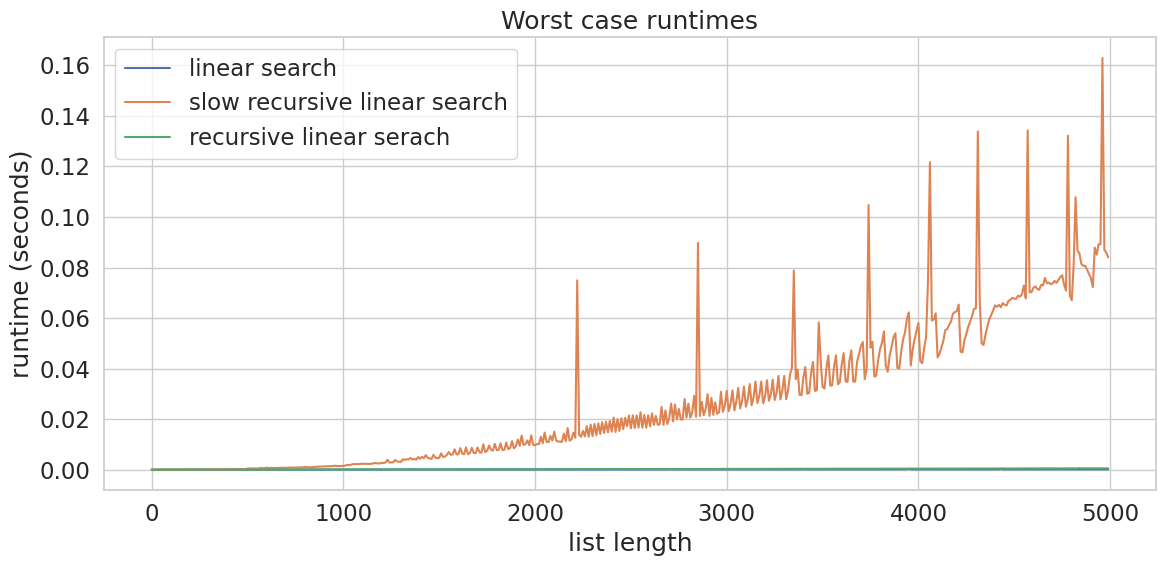

In [9]:
def time_search(fn,mylist,key):
    start_time = time.time()
    fn(mylist,key)
    end_time = time.time()
    return end_time-start_time

inputs = [[list(range(i)),-1]for i in range(0,5_000,10)] #Lol, the recursive methods don't even run for n=5_000 without increasing the max number of recursions.
def time_linear_searches():
    outputs = []
    list_lengths = [len(i[0]) for i in inputs]
    for input in inputs:
        outputs.append(time_search(linear_search, input[0], input[1]))
    plt.plot(list_lengths, outputs, label='linear search')
    outputs = []
    for input in inputs:
        outputs.append(time_search(slow_recursive_linear_search, input[0], input[1]))
    plt.plot(list_lengths, outputs, label='slow recursive linear search')

    outputs = []
    for input in inputs:
        outputs.append(time_search(recursive_linear_search, input[0], input[1]))
    plt.plot(list_lengths, outputs, label=f'recursive linear serach')
    plt.xlabel("list length")
    plt.ylabel('runtime (seconds)')
    plt.title(f'Worst case runtimes')
    plt.legend()
    plt.tight_layout()
    plt.show()
time_linear_searches()

<h3>Why recursion?</h3>

We have seen that recursion creates slower programs than iteration (in Python at least) and that we can always replace recursion with iteration. You will see in future recitations that recursive functions can be confusing to write and can easily create non-terminating programs. So why use recursion at all? Here are some reasons:

1. Some functions are defined mathematically by induction. The recursive definitions of these programs translate easily into recursive programs.
2. Divide-and-conquer algorithms can be easily written using recursion.
3. Recursive functions can be easily parallelized.

Let's re-write our linear search yet again in a form that will be easily parallelizable.

In [10]:
def recursive_linear_search(mylist,key):
    return _recursive_linear_search_parallelizable(mylist, key, 0, len(mylist))
def _recursive_linear_search_parallelizable(mylist,key,start_index,end_index):
    middle_index = (end_index-start_index)//2 #The index in the middle of the list
    if middle_index == start_index:
        return -1
    else:
        if key==mylist[middle_index]:
            return middle_index
        else:
            val1= _recursive_linear_search(mylist, key, start_index, middle_index) #searches the first half of the list
            val2= _recursive_linear_search(mylist, key, middle_index+1, end_index) #searches the second half of the list
            if val1== -1:
                return val2
            else:
                return val1
test_search_function(recursive_linear_search)

This method will search the middle index, then the list to the left of the middle index, and finally the list to the right of the middle index. Clearly, each memory address will be searched once. There is some additional overhead associated with recursion that will make this algorithm $O(n\log(n))$. The two recursive calls that set the values $val1$ and $val2$ can be performed simultaneously, since neither one depends on the other. This example illustrates the general fact that recursive functions are easily parallelizable.

Parallel algorithms can be written without using recursion. One possibility is to split the list into $k$ roughly equal sections, then create $k$ threads, one to search each section. This is easier to implement in PYthon, and we examine it more closely in the lab.

<h3>Parallelism in Python</h3>

Python is not well-suited to writing parallel programs. You can use Python to create threads, but the threads don't actually run in parallel, due to the <i>Global Interpreter Lock</i>. Python is a high-level language that provides a convenient garbarge-collection service that is implemented by counting references to objects, and deleting them once no references remain. Parallel code creates the threat that the reference count can become unreliable and lead to memory leaks. For this reason, the Python interpreter comes with a lock, called the Global Interpreter Lock. Any thread that wishes to perform operations with the Python Interpreter must obtain this lock so only one thread can be active at a time.

Threading in Python can still be useful, even if parallelism is not achieved. For example, if you need to wait on user input, then it is convenient to spin off a thread to wait while another thread continues operating in the background. Behind the scenes, the operating system constantly switches between threads so quickly that they appear to run simultaneously, but actually only one thread is active at a time. Thus, you can write a program to wait asynchronously for user input without achieving true parallelism. By "True parallelism" I mean that multiple cores of the processor should be active at the same time to complete a computation faster than if only one can be active at a time.

Despite the global interpreter lock, it is possible (in fact easy) to achieve parallelism in Python. The trick is to use <i>processes</i> rather than threads. Processes are essentially running programs, as seen by the operating system. A sequential process will have only $1$ thread. Processes can usually uses multiple threads to achieve paralellism, but Python processes cannot, due to the global interpreter lock. However, Python allows you to create new processes, where each new process has its own Python interpreter with its own global interpreter lock. Different processes can take advantage of the CPU's multiple cores to achieve true parallelism. The drawback is that processes have a lot of overhead, so they are less efficient than threads.

<h3>Binary Search: finding zeros of continuous functions</h3>

We described Binary Search in a very particular setting, where the input was assumed to be an array on a RAM machine. The idea is more general.

Let $f:[0,1]\to \mathbb{R}$ be a continuous function such that $f(0)<0 $ and $f(1)>0$. The Intermediate Value Theorem states that $f(z)=0$ for some $z\in (0,1)$. Suppose that $f$ is implemented in code, and we can run the function at various values and we want to find $z$. Of course, we can only do this up to an error $\epsilon$.

In [11]:
def example_function(x):
    return x-0.5
def binary_search_for_zeros(f,a,b,epsilon=0.001):
    #Assume that f(a)<0, f(b)>0 and f is continuous
    #Return z such that |f(z)|<epsilon
    while b-a> epsilon**2: #This can basically be "While True" but I don't want it to loop forever, like if f is not continuous.
        c = (a+b)/2
        fc = f(c)
        if abs(fc)<epsilon:
            return c
        elif fc<0:
            return binary_search_for_zeros(f,c,b,epsilon)
        elif fc>0:
            return binary_search_for_zeros(f,a,c,epsilon)
print(binary_search_for_zeros(example_function,0,1))

0.5


<h3>Binary search performance</h3>

The performance of binary search depends on several factors.

1. The amount of time it takes f(c).
2. The size of $\epsilon$.
3. The location of $z$.

Let's assume it takes constant time to calculate $f(c)$. Assume that $\epsilon =(0.1)^n$ for some $n\in \mathbb{N}$. Thus, our input size $n$ is the number of digits of precision of our arithmetic. We choose the worst-case value for $z$ under these circumstances. This is still not enough information to bound the performance of the algorithm.

Let's further assume that the derivative $|f'(c)|<1$. Then the algorithm can terminate as soon as $b-a<2\epsilon$. The size of $b-a$ shrinks by a factor of $2$ after each call. After $i$ calls, the interval containing $z$ is at most $2^{-i}$. After $i=\log(\epsilon)\in O(n)$ recursions, each interval will have size $O\epsilon$, so the binary search algorithm for zeros of continuous functions is roughly linear time.